In [1]:
import glob
import seaborn
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# Read in data

In [2]:
ds_temp = xr.open_dataset('/glade/campaign/cgd/tss/czarakas/'+
                           'COUP0000_PI_SOM'+
                           '/atm/hist/'+
                           'COUP0000_PI_SOM.cam.h1.0049-10.nc')
weights =ds_temp.gw/ds_temp.gw.mean(dim='lat')

ds_temp2 = xr.open_dataset('/glade/campaign/cgd/tss/czarakas/'+
                           'COUP0000_PI_SOM'+
                           '/lnd/hist/'+
                           'COUP0000_PI_SOM.clm2.h0.0049-02-01-00000.nc')

landarea=(ds_temp2.area*ds_temp2.landfrac)
landweights=landarea/landarea.mean(dim=['lat','lon'])

In [96]:
var='GPP'
ds_coupled=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/COUP0000_PI_SOM/lnd/'+
                           'proc/tseries/COUP0000_PI_SOM.clm2.h0.timeseries.'+var+'.nc')

In [97]:
ds_offline = xr.open_dataset('/glade/scratch/czarakas/archive/'+
                             'OFFL0000_PI_CPLhist/lnd/proc/tseries/'+
                             'OFFL0000_PI_CPLhist.clm2.h0.timeseries.'+var+'.nc')

In [98]:
ds_offline_v02 = xr.open_dataset('/glade/scratch/czarakas/archive/'+
                             'OFFL0000_PI_CPLhist/lnd/proc/tseries/'+
                             'OFFL0000_PI_CPLhist.clm2.h0.timeseries.'+var+'.nc')

# Check that offline and coupled are similar

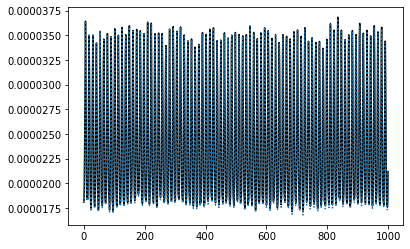

In [99]:
stoptime=1000
plt.plot((ds_coupled[var]*landweights).mean(dim=['lat','lon'])[0:stoptime],'-k')
plt.plot((ds_offline[var]*landweights).mean(dim=['lat','lon'])[0:stoptime],':')

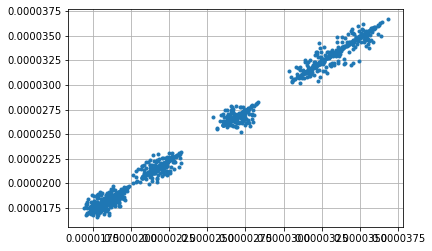

In [100]:
plt.plot((ds_coupled[var]*landweights).mean(dim=['lat','lon']),
         (ds_offline[var]*landweights).mean(dim=['lat','lon'])[0:1668],'.')
#plt.plot([1.3,1.9],[1.3,1.9],'-k')
plt.grid()

In [101]:
ds_offline.time

<xarray.DataArray 'time' (time: 1680)>
array([cftime.DatetimeNoLeap(49, 2, 1, 0, 0, 0, 0, 3, 32),
       cftime.DatetimeNoLeap(49, 3, 1, 0, 0, 0, 0, 3, 60),
       cftime.DatetimeNoLeap(49, 4, 1, 0, 0, 0, 0, 6, 91), ...,
       cftime.DatetimeNoLeap(188, 11, 1, 0, 0, 0, 0, 2, 305),
       cftime.DatetimeNoLeap(188, 12, 1, 0, 0, 0, 0, 4, 335),
       cftime.DatetimeNoLeap(189, 1, 1, 0, 0, 0, 0, 0, 1)], dtype=object)
Coordinates:
  * time     (time) object 0049-02-01 00:00:00 ... 0189-01-01 00:00:00
Attributes:
    long_name:     time
    bounds:        time_bounds
    cell_methods:  time: mean

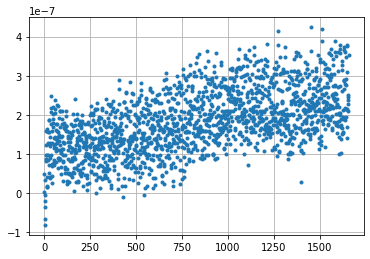

In [102]:
plt.plot(((ds_coupled[var]*landweights).mean(dim=['lat','lon'])-
          (ds_offline[var]*landweights).mean(dim=['lat','lon'])[0:1668]),'.')
#plt.plot([1.3,1.9],[1.3,1.9],'-k')
plt.grid()

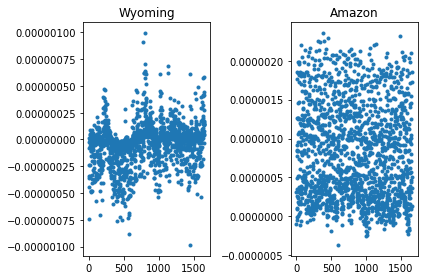

In [103]:
ilat=70
ilon=100
stoptime=1668
plt.subplot(1,2,1)
plt.plot((ds_coupled[var][0:stoptime,ilat,ilon]-
          ds_offline[var][0:stoptime,ilat,ilon]),'.')
plt.title('Wyoming')

ilat=45
ilon=120
plt.subplot(1,2,2)
plt.plot((ds_coupled[var][0:stoptime,ilat,ilon]-
          ds_offline[var][0:stoptime,ilat,ilon]),'.')
plt.title('Amazon')
plt.tight_layout()

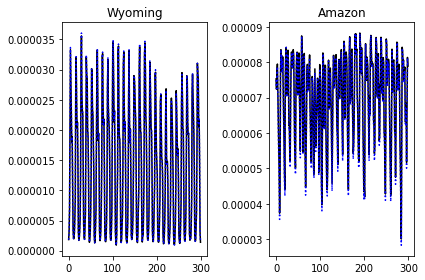

In [104]:
ilat=70
ilon=100
stoptime=300
plt.subplot(1,2,1)
plt.plot(ds_coupled[var][0:stoptime,ilat,ilon],'-k')
plt.plot(ds_offline[var][0:stoptime,ilat,ilon],':b')
plt.title('Wyoming')

ilat=45
ilon=120
plt.subplot(1,2,2)
plt.plot(ds_coupled[var][0:stoptime,ilat,ilon],'-k')
plt.plot(ds_offline[var][0:stoptime,ilat,ilon],':b')
plt.title('Amazon')
plt.tight_layout()

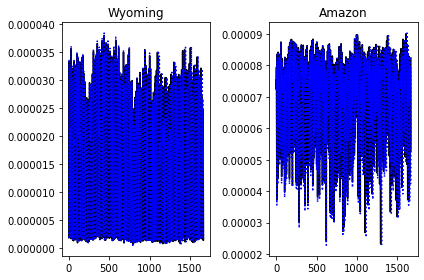

In [105]:
ilat=70
ilon=100
stoptime=1668
plt.subplot(1,2,1)
plt.plot(ds_coupled[var][0:stoptime,ilat,ilon],'-k')
plt.plot(ds_offline[var][0:stoptime,ilat,ilon],':b')
plt.title('Wyoming')

ilat=45
ilon=120
plt.subplot(1,2,2)
plt.plot(ds_coupled[var][0:stoptime,ilat,ilon],'-k')
plt.plot(ds_offline[var][0:stoptime,ilat,ilon],':b')
plt.title('Amazon')
plt.tight_layout()

In [106]:
diff_map = (ds_coupled[var][1000:1668,:,:].mean(dim='time')-
            ds_offline[var][1000:1668,:,:].mean(dim='time'))

/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


-3.7498284655157477e-07
9.292816685047001e-07


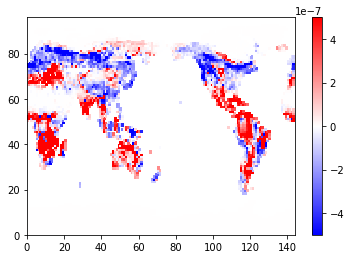

In [112]:
print(np.nanpercentile(diff_map,5))
print(np.nanpercentile(diff_map,95))
plt.pcolor(diff_map, cmap=plt.cm.bwr, vmin=-5e-7, vmax=5e-7)
plt.colorbar()

# Compare two offline simulations (which should be *identical*)

In [82]:
stoptime = np.size(ds_offline_v02.time)

In [83]:
diff = (ds_offline[var][0:stoptime,:,:]-
        ds_offline_v02[var][0:stoptime,:,:])

In [84]:
print(np.nanmax(diff))
print(np.nanmin(diff))

0.0
0.0


Text(0.5, 1.0, 'Amazon')

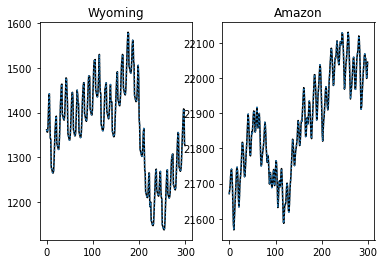

In [85]:
ilat=70
ilon=100
stoptime=300
plt.subplot(1,2,1)
plt.plot(ds_offline[var][0:stoptime,ilat,ilon],'-k')
plt.plot(ds_offline_v02[var][0:stoptime,ilat,ilon],':')
plt.title('Wyoming')

ilat=45
ilon=120
plt.subplot(1,2,2)
plt.plot(ds_offline[var][0:stoptime,ilat,ilon],'-k')
plt.plot(ds_offline_v02[var][0:stoptime,ilat,ilon],':')
plt.title('Amazon')

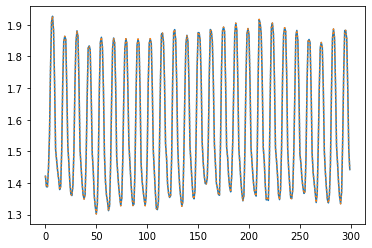

In [30]:
plt.plot((ds_offline[var]*landweights).mean(dim=['lat','lon'])[0:stoptime])
plt.plot((ds_offline_v02[var]*landweights).mean(dim=['lat','lon'])[0:stoptime],':')